In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [31]:
data=pd.read_csv('haberman.csv')

In [32]:
data.head()

,30,64,1,1.1
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [33]:
data.isnull().sum()

30     0
64     0
1      0
1.1    0
dtype: int64

In [34]:
data.describe()


,30,64,1,1.1
count,305.000000,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066,1.265574
std,10.744024,3.254078,7.199370,0.442364
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,61.000000,66.000000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


<Axes: >

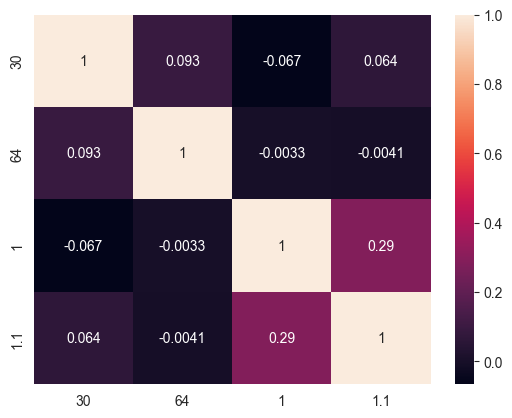

In [35]:
sns.heatmap(data.corr(),annot=True)

In [36]:
data.shape
# data=(data-data.mean())/data.std()

(305, 4)

In [37]:
print(data['1.1'].value_counts())

data['1.1']=data['1.1'].replace(2,0)

print(data['1.1'].value_counts())

label=data['1.1']
data=data.drop('1.1',axis=1)
print(data.head())

label=label.values
data=data.values

print(data.shape,label.shape)


1.1
1    224
2     81
Name: count, dtype: int64
1.1
1    224
0     81
Name: count, dtype: int64
   30  64   1
0  30  62   3
1  30  65   0
2  31  59   2
3  31  65   4
4  33  58  10
(305, 3) (305,)


In [38]:
split=0.8

train_x=data[:int(split*data.shape[0])] 
train_y=label[:int(split*label.shape[0])]

test_x=data[int(split*data.shape[0]):]
test_y=label[int(split*label.shape[0]):]

ones=np.ones((train_x.shape[0],1))
train_x=np.hstack((ones,train_x))

ones=np.ones((test_x.shape[0],1))
test_x=np.hstack((ones,test_x))

print(train_x.shape,train_y.shape,test_x.shape,test_y.shape)

(244, 4) (244,) (61, 4) (61,)


In [39]:
def sigmoid(x):
    return 1/(1+np.exp(-x)) 

In [40]:
def hypothesis(X,w):
    return sigmoid(np.dot(X,w))

In [41]:
def loss_function(x,y,w):
    hyp_th=hypothesis(x,w)
    loss = -1.0*np.mean((y*np.log(hyp_th) + ((1-y)*np.log(1-hyp_th))))
    return loss

In [42]:
def gradient(x,y,w):
    hyp_th=hypothesis(x,w)
    grad = np.dot(x.T,(y-hyp_th))
    return grad/x.shape[0]

In [43]:
def gradient_descent(x,y):
    lr=0.001
    epochs=2000
    loss=[]
    w=np.zeros((x.shape[1],))
    for i in range(epochs):
        grad=gradient(x,y,w)
        loss.append(loss_function(x,y,w))
        w=w+lr*grad
    return w,loss

In [44]:
w,loss=gradient_descent(train_x,train_y)

In [45]:
print(w)

[ 0.00531107 -0.01876364  0.037397   -0.088947  ]


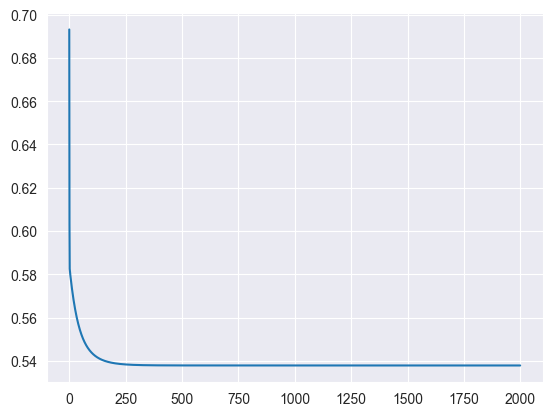

In [46]:
plt.plot(loss)

In [47]:
def accuracy(data, label):
    correct = 0
    for i in range(data.shape[0]):
        pred = hypothesis(data[i], w)
        if pred >= 0.5:
            pred = 1
        else:
            pred = 0
        if pred == label[i]:
            correct += 1
    return correct/data.shape[0]

print(accuracy(test_x, test_y))

0.7377049180327869
